In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
from matplotlib import colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
import numpy as np
np.set_printoptions(threshold='nan')
import pandas as pd
import seaborn as sns
import sys
if sys.version_info[0] < 3:
    import Tkinter as Tk
else:
    import tkinter as Tk
    
#from tkFileDialog import askopenfilename,askdirectory,asksaveasfile
sys.path.append('python')
import clusterOutliers
import keplerml

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [2]:
# the FullSample is all common points between Quarters 4, 8, 11, and 16. These files are set up as pandas dataframes
# and contain calculated features and previously computed cluster identifications.

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q4.dataSample = Q4.data
Q4.filesSample =Q4.dataSample.index
Q4.sampleGenerated = True
Q4.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q8_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q8fitsfiles" # path to fits files
Q8 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
# This is only a sampling of the data, so the dataSample is, by definition, the data
Q8.dataSample=Q8.data
Q8.filesSample=Q8.dataSample.index
# Specify that the sample is a good one
Q8.sampleGenerated = True
# Specifying that the sample has a TSNE reduction
Q8.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q11_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q11fitsfiles" # path to fits files
Q11 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q11.dataSample = Q11.data
Q11.filesSample =Q11.dataSample.index
Q11.sampleGenerated = True
Q11.sampleTSNE = True

featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q16_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q16fitsfiles" # path to fits files
Q16 = clusterOutliers.clusterOutliers(featCSV,fitsDir)
Q16.dataSample = Q16.data
Q16.filesSample =Q16.dataSample.index
Q16.sampleGenerated = True
Q16.sampleTSNE = True

Q_dict = {'Q4':Q4,'Q8':Q8,'Q11':Q11,'Q16':Q16}

In [4]:
featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_4" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_8" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q8_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_11" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q11_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

featCSV = "/home/dgiles/Documents/KeplerLCs/output/paper_sample_16" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q16_sample = clusterOutliers.clusterOutliers(featCSV,fitsDir)

Q_dict = {'Q4':Q4_sample,'Q8':Q8_sample,'Q11':Q11_sample,'Q16':Q16_sample}

In [4]:
%matplotlib inline

def four_panel_tsne(data):
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(422)

    ax1.scatter(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                c=colorVal[labels==-1][outliers.tsne_x<40],
                marker='.',alpha=.2)
    ax1.set_title('Outliers')

    ax2 = fig.add_subplot(421)
    ax2.scatter(core.tsne_x,
                core.tsne_y,
                c=colorVal[labels==0],
                marker='.',alpha=.2)
    ax2.set_title('Cluster Core Members')

    ax3 = fig.add_subplot(423)
    ax3.scatter(edge.tsne_x,
                edge.tsne_y,
                c=colorVal[labels==1],
                marker='.',alpha=.2)
    ax3.set_title('Cluster Edge Members')
    
    ax4 = fig.add_subplot(424)
    ax4.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

In [5]:
%matplotlib inline

from matplotlib import colors
import matplotlib.cm as cmx

def four_panel_pca(data):
    labels = data.db_out
    outliers = data[labels==-1]
    core = data[labels==0]
    edge = data[labels==1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(422)

    ax1.scatter(outliers.pca_x,
                outliers.pca_y,
                c=colorVal[labels==-1],
                marker='.',alpha=.2)
    ax1.set_title('Outliers')

    ax2 = fig.add_subplot(421)
    ax2.scatter(core.pca_x,
                core.pca_y,
                c=colorVal[labels==0],
                marker='.',alpha=.2)
    ax2.set_title('Cluster Core Members')

    ax3 = fig.add_subplot(423)
    ax3.scatter(edge.pca_x,
                edge.pca_y,
                c=colorVal[labels==1],
                marker='.',alpha=.2)
    ax3.set_title('Cluster Edge Members')
    
    ax4 = fig.add_subplot(424)
    ax4.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[data.tsne_x<40],
                marker='.',alpha=.2)
    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

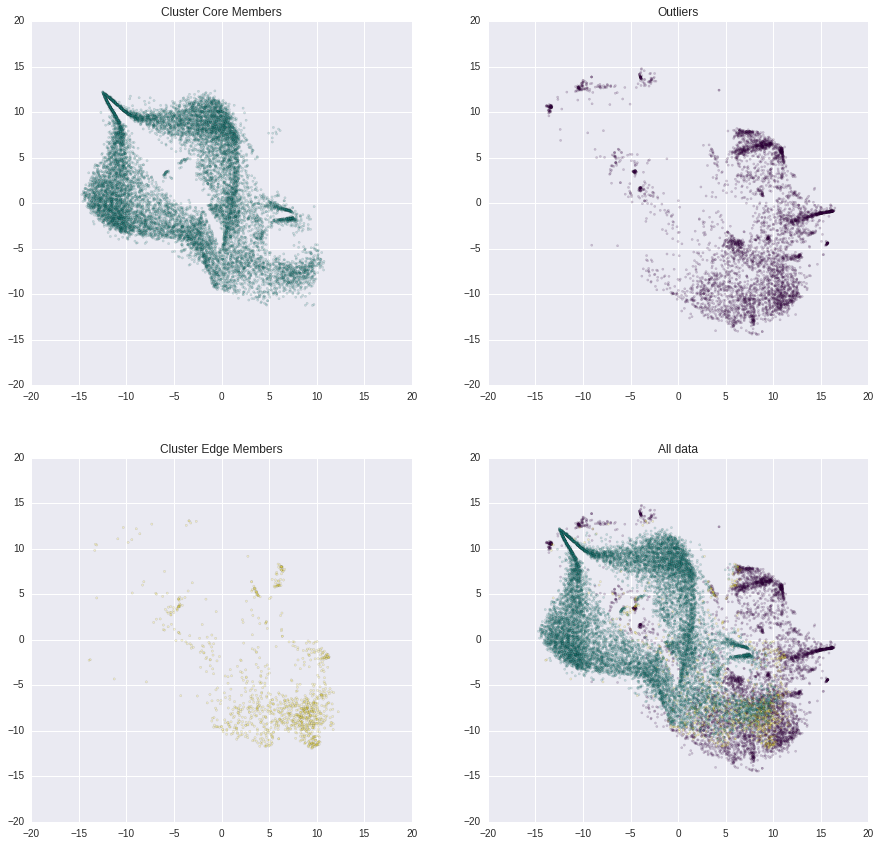

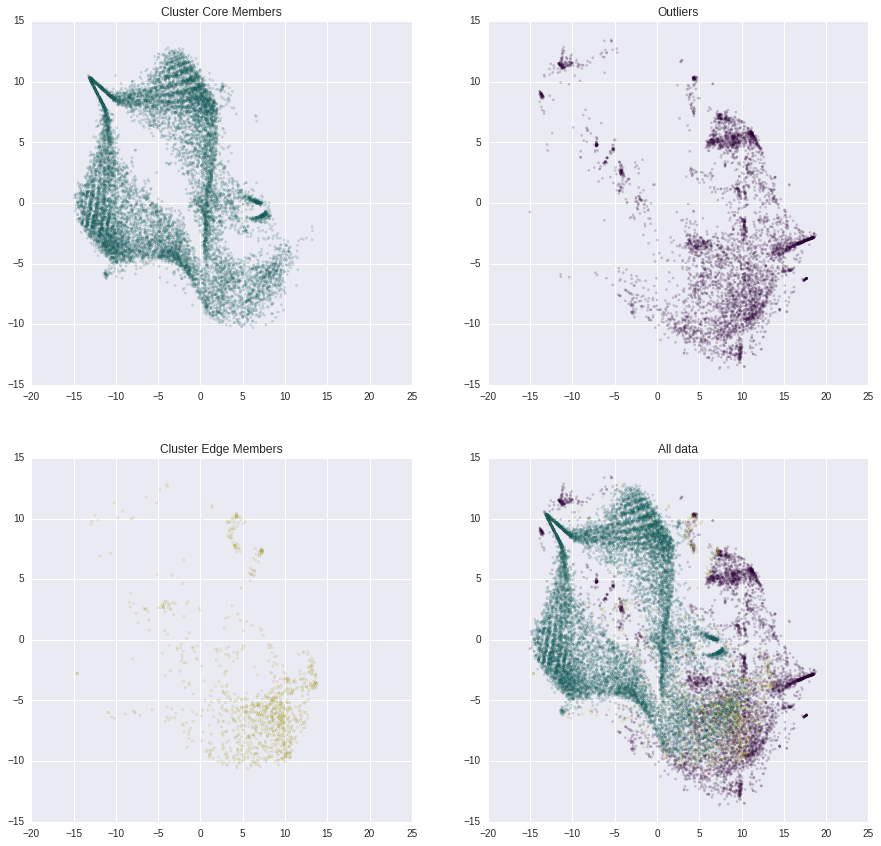

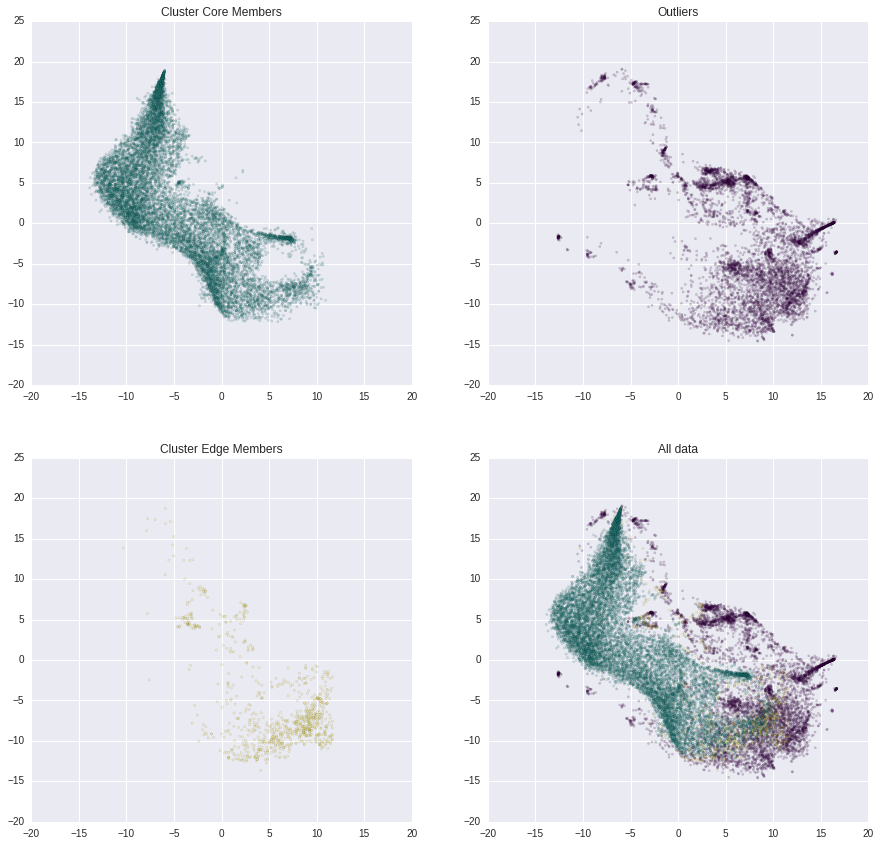

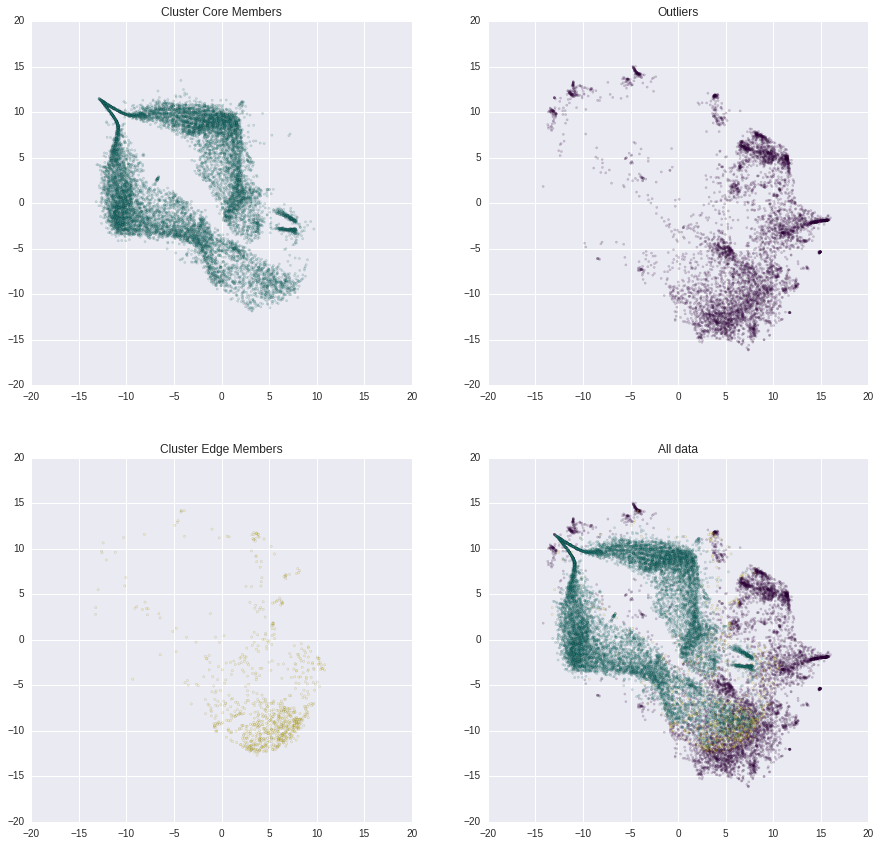

In [7]:
four_panel_tsne(Q4_sample.data)
four_panel_tsne(Q8_sample.data)
four_panel_tsne(Q11_sample.data)
four_panel_tsne(Q16_sample.data)

<IPython.core.display.Javascript object>


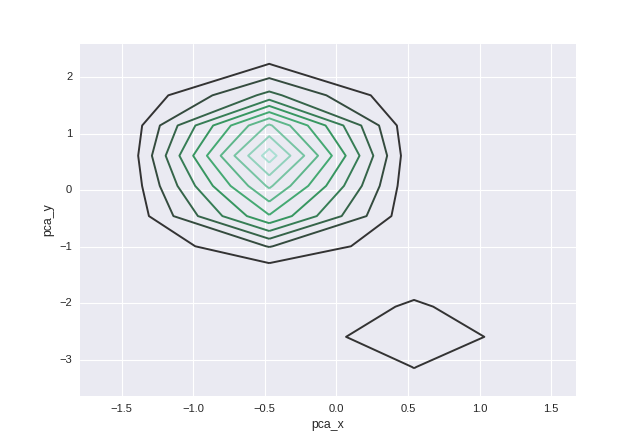

/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/dgiles/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [3]:
%matplotlib notebook
sns.kdeplot(Q4.data[Q4.data.pca_x<100].pca_x,Q4.data[Q4.data.pca_x<100].pca_y,shade=False)

<IPython.core.display.Javascript object>


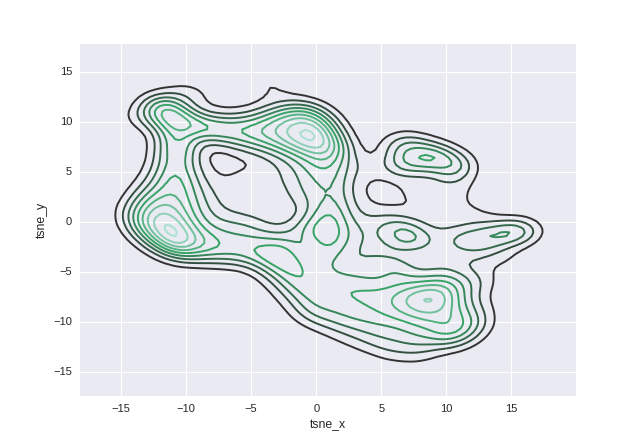

In [7]:

sns.kdeplot(Q4_sample.data[Q4_sample.data.tsne_x<40].tsne_x,
            Q4_sample.data[Q4_sample.data.tsne_x<40].tsne_y,
            shade=False)


<IPython.core.display.Javascript object>


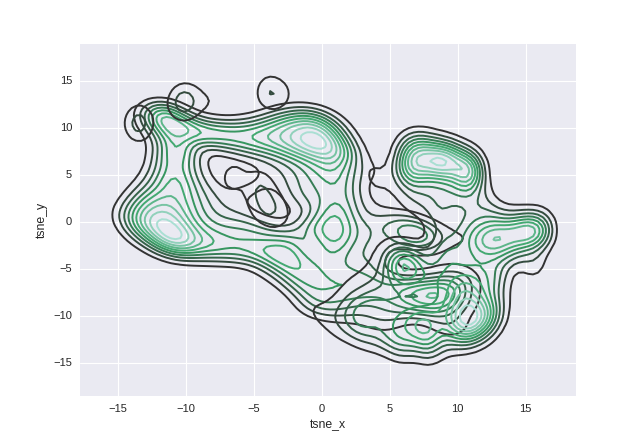

In [10]:
%matplotlib notebook
inliers = Q4_sample.data[Q4_sample.data.db_out>=0]
outliers = Q4_sample.data[Q4_sample.data.db_out==-1]
sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
            inliers[inliers.tsne_x<40].tsne_y,
            shade=False)
sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
            outliers[outliers.tsne_x<40].tsne_y,
            shade=False)


In [12]:

def four_panel_kde(data):
    labels = data.db_out
    outliers = data[labels==-1]
    inliers = data[labels!=-1]
    
    cNorm  = colors.Normalize(vmin=min(labels), vmax=max(labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='viridis')
    colorVal = scalarMap.to_rgba(labels)

    fig = plt.figure(figsize=(15,30))
    ax1 = fig.add_subplot(421)

    ax1.scatter(data[data.tsne_x<40].tsne_x,
                data[data.tsne_x<40].tsne_y,
                c=colorVal[labels==-1],
                marker='.',alpha=.2)
    ax1.set_title('All Data')

    ax2 = fig.add_subplot(422)
    sns.kdeplot(inliers[inliers.tsne_x<40].tsne_x,
                inliers[inliers.tsne_x<40].tsne_y,
                shade=False,ax=ax2)
    ax2.set_title('Cluster Members')

    ax3 = fig.add_subplot(423)
    sns.kdeplot(outliers[outliers.tsne_x<40].tsne_x,
                outliers[outliers.tsne_x<40].tsne_y,
                shade=False,ax=ax3)
    ax3.set_title('Outliers')
    
    ax4 = fig.add_subplot(424)
    sns.kdeplot(data[data.tsne_x<40].tsne_x,
            data[data.tsne_x<40].tsne_y,
            shade=False,ax=ax4)
    ax4.set_title('All data')
    
    ax1.set_xlim(ax4.get_xlim())
    ax1.set_ylim(ax4.get_ylim())
    ax2.set_xlim(ax4.get_xlim())
    ax2.set_ylim(ax4.get_ylim())
    ax3.set_xlim(ax4.get_xlim())
    ax3.set_ylim(ax4.get_ylim())

    return

<IPython.core.display.Javascript object>


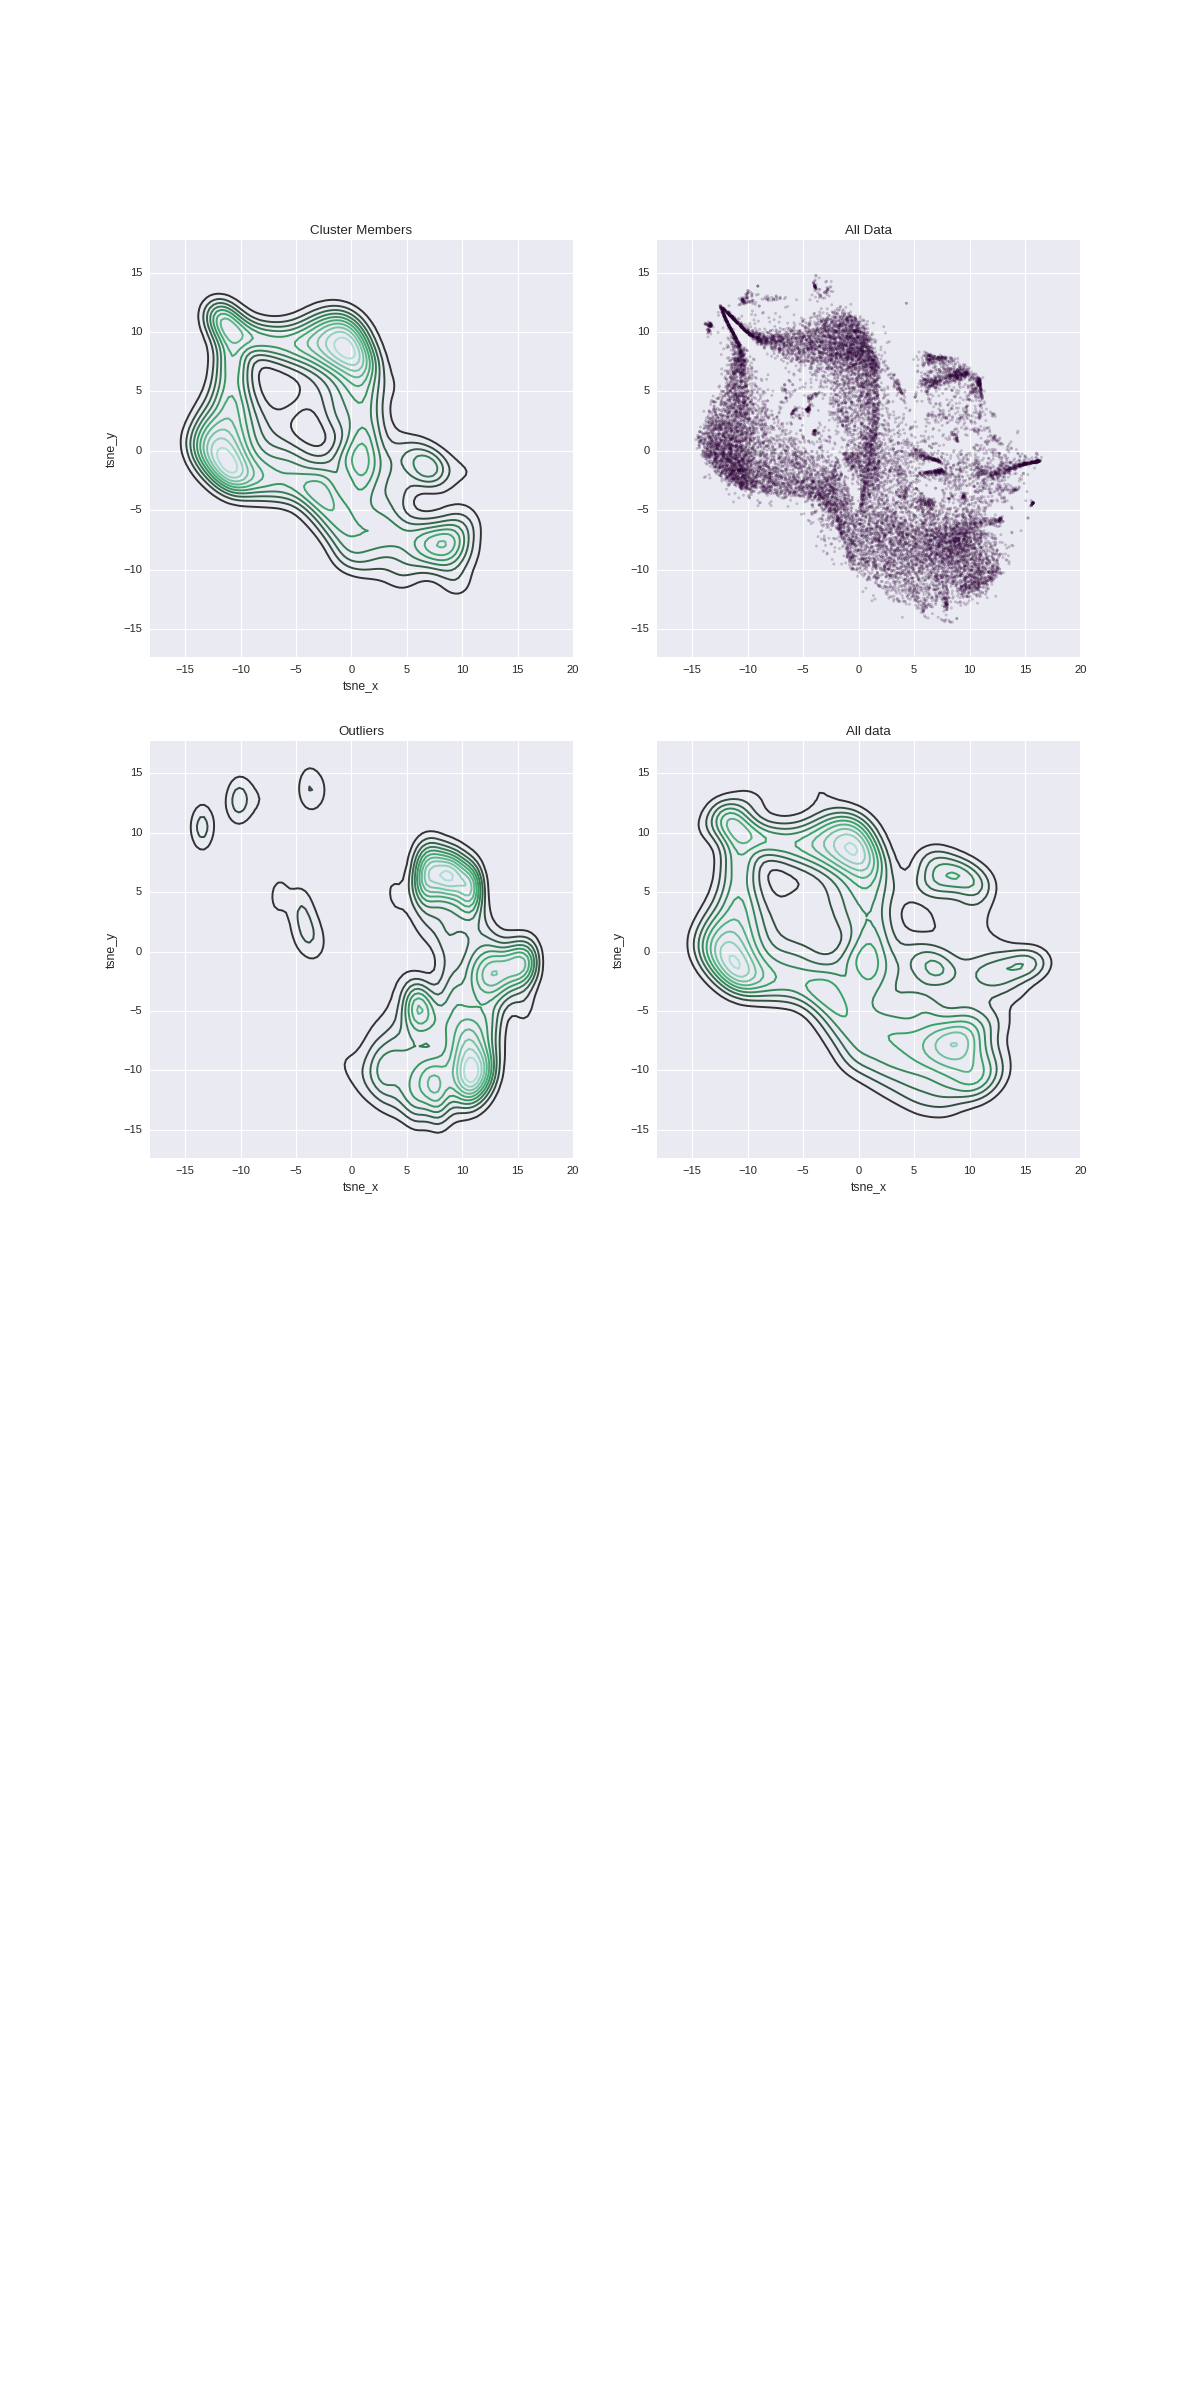

In [13]:
four_panel_kde(Q4_sample.data)